In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
c1 = pd.read_csv('../data/ts_segment1.csv')
c2 = pd.read_csv('../data/ts_segment2.csv')
c3 = pd.read_csv('../data/ts_segment3.csv')
c4 = pd.read_csv('../data/ts_segment4.csv')

In [3]:
c11 = pd.read_csv('../data/ts_segment11.csv')
c22 = pd.read_csv('../data/ts_segment22.csv')
c33 = pd.read_csv('../data/ts_segment33.csv')
c44 = pd.read_csv('../data/ts_segment44.csv')

In [4]:
def clean_rev (df):
    df.columns = ['ds','y']
    df.ds = pd.to_datetime(df.ds).dt.strftime('%Y-%m')
    df = df[df.ds > '2009-12']
    
#    df['z_score'] = stats.zscore(df.y)
#    df = df[(df.z_score >= -3) & (df.z_score <= 3)]
#    df = df.drop(columns='z_score')
    return df

In [5]:
def clean_qty (df):
    df.columns = ['ds','y']
    df.ds = pd.to_datetime(df.ds).dt.strftime('%Y-%m')
    df = df[df.ds > '2009-12']


    
#    df['z_score'] = stats.zscore(df.y)
#    df = df[(df.z_score >= -3) & (df.z_score <= 3)]
#    df = df.drop(columns='z_score')
    return df

In [6]:
k1 = clean_rev(c1)
k2 = clean_rev(c2)
k3 = clean_rev(c3)
k4 = clean_rev(c4)

In [7]:
k11 = clean_qty(c11)
k22 = clean_qty(c22)
k33 = clean_qty(c33)
k44 = clean_qty(c44)

Index function

In [8]:
gb1 = pd.DataFrame(k1.groupby('ds')['y'].mean()).reset_index()
gb2 = pd.DataFrame(k2.groupby('ds')['y'].mean()).reset_index()
gb3 = pd.DataFrame(k3.groupby('ds')['y'].mean()).reset_index()
gb4 = pd.DataFrame(k4.groupby('ds')['y'].mean()).reset_index()

In [9]:
gb1

,ds,y
0,2010-01,45.593785
1,2010-02,43.681533
2,2010-03,66.102034
3,2010-04,41.349114
4,2010-05,46.748914
5,2010-06,55.837604
6,2010-07,49.583874
7,2010-08,51.677313
8,2010-09,65.432840
9,2010-10,42.895128


In [10]:
val1 = gb1.y[0]
val2 = gb2.y[0]
val3 = gb3.y[0]
val4 = gb4.y[0]

In [11]:
gb1["index"] = gb1.apply(lambda y: division(y["y"], val), axis = 1)
gb2["index"] = gb2.apply(lambda y: division(y["y"], val), axis = 1)
gb3["index"] = gb3.apply(lambda y: division(y["y"], val), axis = 1)
gb4["index"] = gb4.apply(lambda y: division(y["y"], val), axis = 1)

NameError: name 'division' is not defined

In [12]:
gb1.groupby('ds')['index'].sum().plot(label='Best')
gb2.groupby('ds')['index'].sum().plot(label='Good')
gb3.groupby('ds')['index'].sum().plot(label='Regular')
gb4.groupby('ds')['index'].sum().plot(label='Low')

plt.legend()
plt.show()

KeyError: 'Column not found: index'

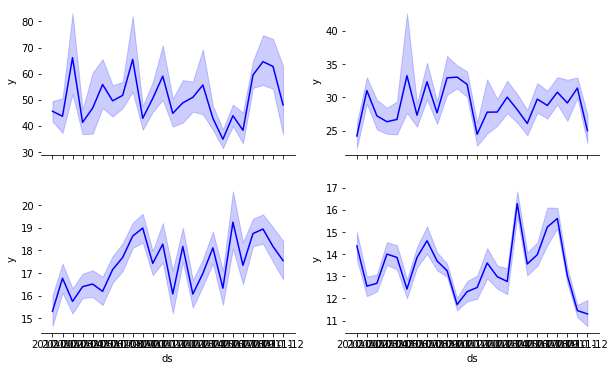

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
sns.despine(left=True)

sns.lineplot(data=k1, x='ds', y='y', color="b", ax=axes[0,0])
sns.lineplot(data=k2, x='ds', y='y', color="b", ax=axes[0,1])
sns.lineplot(data=k3, x='ds', y='y', color="b", ax=axes[1,0])
sns.lineplot(data=k4, x='ds', y='y', color="b", ax=axes[1,1])

plt.show();

In [14]:
"""k1.set_index('ds').plot(figsize=(15,6))
k2.set_index('ds').plot(figsize=(15,6))
k3.set_index('ds').plot(figsize=(15,6))
k4.set_index('ds').plot(figsize=(15,6))
plt.show()""";

In [15]:
trend1 = k1.groupby('ds')['y'].sum()
trend2 = k2.groupby('ds')['y'].sum()
trend3 = k3.groupby('ds')['y'].sum()
trend4 = k4.groupby('ds')['y'].sum()

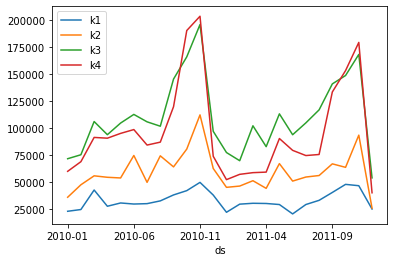

In [16]:
trend1.plot(label='k1')
trend2.plot(label='k2')
trend3.plot(label='k3')
trend4.plot(label='k4')
plt.legend()
plt.show()

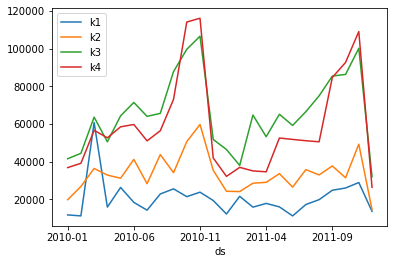

In [17]:
trend11 = k11.groupby('ds')['y'].sum()
trend22 = k22.groupby('ds')['y'].sum()
trend33 = k33.groupby('ds')['y'].sum()
trend44 = k44.groupby('ds')['y'].sum()

trend11.plot(label='k1')
trend22.plot(label='k2')
trend33.plot(label='k3')
trend44.plot(label='k4')
plt.legend()
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.0765
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        638558   0.000108282       13964.3      0.8861      0.8861      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        638590   0.000379535       9208.18           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        638602   6.67055e-05       3243.78           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389        638608   3.28135e-05       758.254           1           1      465   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


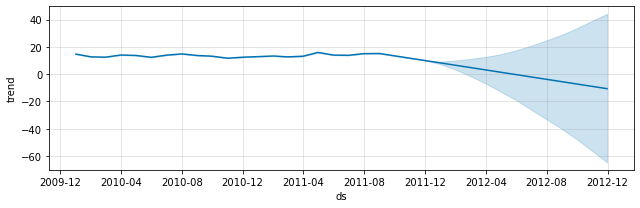

In [18]:
model = Prophet()
model.fit(k4)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot_components(forecast)

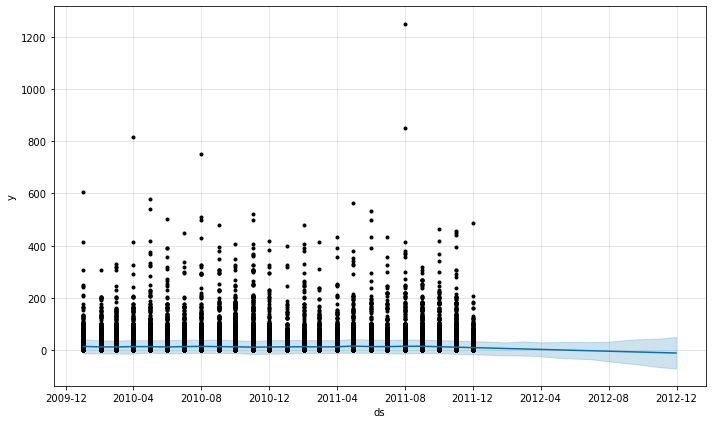

In [19]:
fig1_1 = model.plot(forecast, uncertainty = True)

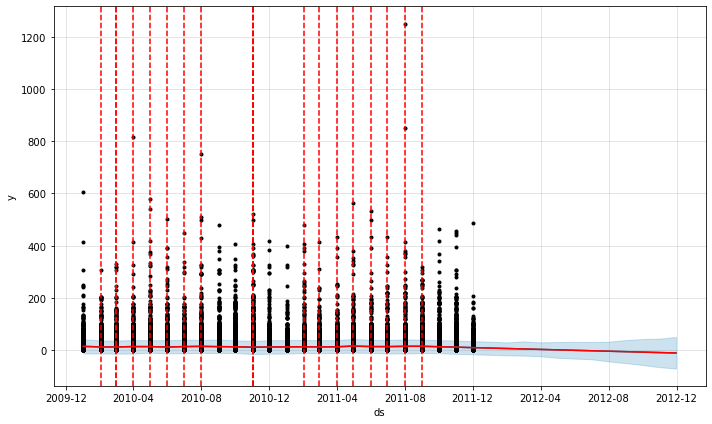

In [20]:
fig1_2 = model.plot(forecast)
a = add_changepoints_to_plot(fig1_2.gca(), model, forecast)

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
